In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [46]:
import torch
#set random seeds for reproduciability
torch.manual_seed(42)

In [47]:
df = pd.read_csv('fashion-mnist_train.csv')

In [48]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51548,2,0,0,0,0,0,0,0,0,28,...,0.0,0.0,0.0,0.0,35.0,70.0,39.0,0.0,0.0,0.0
51549,1,0,0,0,0,0,0,0,0,0,...,142.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51550,7,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51551,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,51553.000000,51553.000000,51553.000000,51553.000000,51553.000000,51553.000000,51553.000000,51553.000000,51553.000000,51553.000000,...,51552.000000,51552.000000,51552.000000,51552.000000,51552.000000,51552.000000,51552.000000,51552.000000,51552.000000,51552.000000
mean,4.498691,0.001047,0.005412,0.034081,0.099761,0.233061,0.400617,0.797083,2.157896,5.675790,...,34.533035,23.197238,16.464327,17.835603,22.761930,17.909858,8.503763,2.734831,0.854205,0.070880
std,2.871134,0.102152,0.228833,1.204954,2.376888,4.055646,5.679726,8.192431,13.919852,23.822167,...,57.457798,48.632658,41.759914,43.903215,51.706385,45.191565,29.550446,17.353771,9.306445,2.176144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,34.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


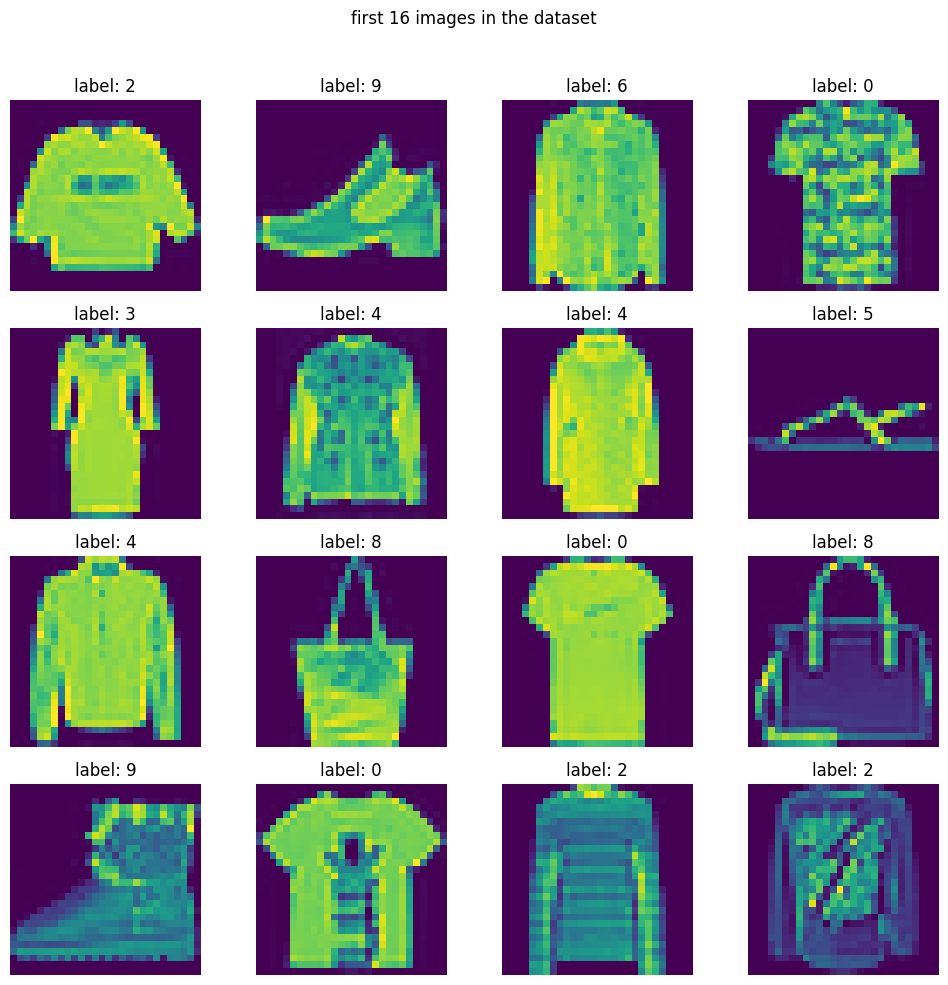

In [50]:
#creating a 4x4 grid images
fig, axis = plt.subplots(4,4, figsize=(10,10))
fig.suptitle('first 16 images in the dataset')

# plot the first 16 images of the dataset

for i,ax in enumerate(axis.flat):
    img = df.iloc[i,1:].values.reshape(28,28) #reshape to 28x28
    ax.imshow(img) # image showing in grey
    ax.axis('off')
    ax.set_title(f'label: {df.iloc[i,0]}') # show lable

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [51]:
# dividing data into train and test

X = df.iloc[:,1:].fillna(0).values # Fill NaN values with 0 before getting values
y = df.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
# scaling featurea -> bacially bringing features in between of 0 and 1

X_train =  X_train/255.0
X_test = X_test/255.0

### creating custom data set class

In [53]:
class CustomDataset(Dataset):

  def __init__(self,features,lables):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.lables = torch.tensor(lables,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.lables[idx]

In [54]:
#creating train and test dataset objects

train_dataset = CustomDataset(X_train,y_train)
test_dataset = CustomDataset(X_test,y_test)

In [55]:
len(train_dataset)

41242

In [56]:
train_dataset[1]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.1569, 0.0314, 0.0392, 0.0235, 0.0078, 0.0000, 0.0000, 0.0353, 0.0627,
         0.1451, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.1765, 0.9725, 0.9412, 0.9490, 0.9490, 0.9490, 0.9412, 0.9412, 0.9490,
         0.9451, 0.9804, 0.6941, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0431, 0.9294, 0.9137, 0.9176, 0.9176, 0.9294, 0.9373, 0.9216,
         0.9176, 0.8980, 0.9451, 0.4471, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.1725, 0.9451, 0.9020, 0.9137, 0.9020, 0.9059, 0.9373,
         0.9176, 0.9137, 0.8941, 0.9333, 0.5373, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [57]:
#creating train and test loader
train_loader = DataLoader(train_dataset,batch_size=32,shuffle=True,pin_memory = True)
test_loader = DataLoader(test_dataset,batch_size=32,shuffle=False,pin_memory = True)

In [58]:
#define nn module
class MyNn(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)

In [64]:
# seting learning rate and epochs
ecochs = 100
learning_rate = 0.01

In [65]:
# instatiate the model
model = MyNn(X_train.shape[1])
model.to(device)

MyNn(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [66]:
#define loss and optimizer
criterian = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=learning_rate)

In [67]:
len(train_loader)

1289

In [68]:
from torch.nn.modules import loss
# training loop

for epochs in range(ecochs):

  total_epoch_loss = 0.0

  for batch_features,batch_lables in train_loader:

    # moving data to GPU
    batch_features = batch_features.to(device)
    batch_lables = batch_lables.to(device)

    #forword pass
    outputs = model(batch_features)

    #calculate loss
    loss  = criterian(outputs,batch_lables)

    #backward pass
    optimizer.zero_grad()
    loss.backward()

    #update grads
    optimizer.step()
    total_epoch_loss += loss.item()

  avg_epoch_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch [{epochs+1}/{ecochs}], Loss: {avg_epoch_loss:.4f}')

Epoch [1/100], Loss: 0.5770
Epoch [2/100], Loss: 0.4491
Epoch [3/100], Loss: 0.4262
Epoch [4/100], Loss: 0.4120
Epoch [5/100], Loss: 0.4012
Epoch [6/100], Loss: 0.3895
Epoch [7/100], Loss: 0.3790
Epoch [8/100], Loss: 0.3762
Epoch [9/100], Loss: 0.3775
Epoch [10/100], Loss: 0.3582
Epoch [11/100], Loss: 0.3694
Epoch [12/100], Loss: 0.3658
Epoch [13/100], Loss: 0.3625
Epoch [14/100], Loss: 0.3495
Epoch [15/100], Loss: 0.3617
Epoch [16/100], Loss: 0.3518
Epoch [17/100], Loss: 0.3516
Epoch [18/100], Loss: 0.3446
Epoch [19/100], Loss: 0.3556
Epoch [20/100], Loss: 0.3434
Epoch [21/100], Loss: 0.3376
Epoch [22/100], Loss: 0.3425
Epoch [23/100], Loss: 0.3340
Epoch [24/100], Loss: 0.3417
Epoch [25/100], Loss: 0.3386
Epoch [26/100], Loss: 0.3310
Epoch [27/100], Loss: 0.3275
Epoch [28/100], Loss: 0.3309
Epoch [29/100], Loss: 0.3218
Epoch [30/100], Loss: 0.3248
Epoch [31/100], Loss: 0.3286
Epoch [32/100], Loss: 0.3294
Epoch [33/100], Loss: 0.3249
Epoch [34/100], Loss: 0.3261
Epoch [35/100], Loss: 0

In [69]:
#set model to eval mode
model.eval()

MyNn(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [70]:
# evaluation code - no builtin functions

total = 0
correct = 0

with torch.no_grad():
  for batch_features,batch_lables in test_loader:
    #moving data to GPU
    batch_features = batch_features.to(device)
    batch_lables = batch_lables.to(device)

    output = model(batch_features)
    _,predicted = torch.max(output.data,1)
    total += batch_lables.shape[0]
    correct += (predicted == batch_lables).sum().item()

print(correct/total)

0.8656774318688779
